In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported ✅")


Libraries Imported ✅


In [ ]:
# Load Datasets
job_skills_df = pd.read_csv('/content/job_skills_dataset_corrected.csv')
learning_resources_df = pd.read_csv('/content/learning_resources_dataset.csv')

print("Datasets Loaded ✅")


Datasets Loaded ✅


In [ ]:
# Display first few rows
job_skills_df.head()


,Job Title,Job Category,Company,Salary,Skills Required
0,Digital Marketing Specialist,Digital Marketing,Meta,12 LPA,"SEM, Email Marketing, Content Marketing, Googl..."
1,Business Analyst,Business Analysis,Infosys,10 LPA,"Power BI, Business Analysis, Requirement Gathe..."
2,Digital Marketing Specialist,Digital Marketing,Cisco,8 LPA,"SEO, SEM, Google Analytics"
3,DevOps Engineer,DevOps,Microsoft,24 LPA,"Linux, AWS, CI/CD, Docker, Kubernetes"
4,Business Analyst,Business Analysis,IBM,10 LPA,"Business Analysis, Power BI, SQL, Requirement ..."


In [ ]:
# Clean whitespace
job_skills_df['Skills Required'] = job_skills_df['Skills Required'].str.strip()
job_skills_df['Skills Required'] = job_skills_df['Skills Required'].str.replace(' ', '')


In [ ]:
# Split skills into lists
job_skills_df['Skill_List'] = job_skills_df['Skills Required'].str.split(',')

# View example
job_skills_df[['Job Title', 'Skill_List']].head()



,Job Title,Skill_List
0,Digital Marketing Specialist,"[SEM, EmailMarketing, ContentMarketing, Google..."
1,Business Analyst,"[PowerBI, BusinessAnalysis, RequirementGatheri..."
2,Digital Marketing Specialist,"[SEO, SEM, GoogleAnalytics]"
3,DevOps Engineer,"[Linux, AWS, CI/CD, Docker, Kubernetes]"
4,Business Analyst,"[BusinessAnalysis, PowerBI, SQL, RequirementGa..."


Number of unique job categories: 10

Unique Categories:
['Digital Marketing' 'Business Analysis' 'DevOps'
 'Artificial Intelligence' 'Database Management' 'Cybersecurity'
 'Cloud Computing' 'Software Engineering' 'Data Science' 'Web Development']
Number of unique job titles: 12
Number of unique companies: 11
Number of unique skills: 66
Number of times each skill appears: 
 SQL             2053
Python          1764
Excel            689
Linux            689
Tableau          681
                ... 
SIEM              74
Cryptography      71
JUnit             65
Azure             64
GCP               63
Name: count, Length: 66, dtype: int64


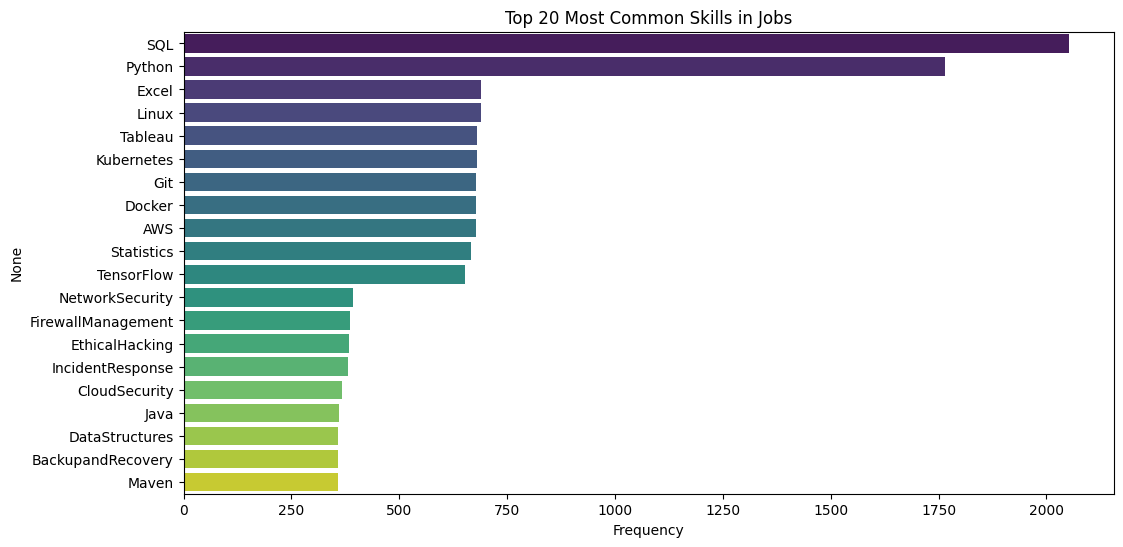

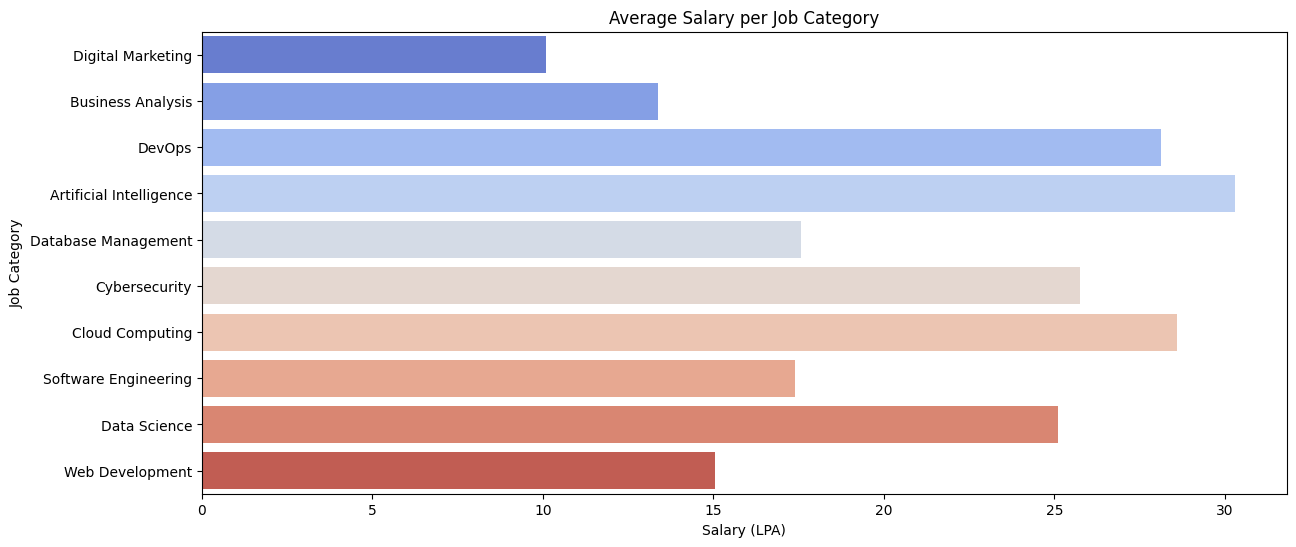

In [ ]:
print("Number of unique job categories:", job_skills_df['Job Category'].nunique())
print("\nUnique Categories:")
print(job_skills_df['Job Category'].unique())

print("Number of unique job titles:", job_skills_df['Job Title'].nunique())

print("Number of unique companies:", job_skills_df['Company'].nunique())


# Plotting Top 20 Most Common Skills
all_skills = [skill for sublist in job_skills_df['Skill_List'] for skill in sublist]
print("Number of unique skills:", len(set(all_skills)))
skill_counts = pd.Series(all_skills).value_counts()
print("Number of times each skill appears: \n",skill_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=skill_counts.head(20).values, y=skill_counts.head(20).index, palette='viridis')
plt.title("Top 20 Most Common Skills in Jobs")
plt.xlabel("Frequency")
plt.show()

# Plot average salary per job category
job_skills_df['Salary_Numeric'] = job_skills_df['Salary'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(14,6))
sns.barplot(x='Salary_Numeric', y='Job Category', data=job_skills_df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title("Average Salary per Job Category")
plt.xlabel("Salary (LPA)")
plt.show()



In [ ]:
# Multi-hot Encoding for skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(job_skills_df['Skill_List']), columns=mlb.classes_)

# Concatenate encoded skills with original DataFrame
jobs_encoded_df = pd.concat([job_skills_df[['Job Title', 'Job Category', 'Company', 'Salary']], skills_encoded], axis=1)

print("Skills Multi-hot Encoded ✅")
jobs_encoded_df.head()


Skills Multi-hot Encoded ✅


,Job Title,Job Category,Company,Salary,APIs,AWS,AgileMethodology,Ansible,Azure,BackupandRecovery,...,SEM,SEO,SIEM,SQL,SocialMediaMarketing,SpringBoot,Statistics,Tableau,TensorFlow,Terraform
0,Digital Marketing Specialist,Digital Marketing,Meta,12 LPA,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,Business Analyst,Business Analysis,Infosys,10 LPA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Digital Marketing Specialist,Digital Marketing,Cisco,8 LPA,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,DevOps Engineer,DevOps,Microsoft,24 LPA,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Business Analyst,Business Analysis,IBM,10 LPA,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Encode Job Categories (if needed for supervised later)
le = LabelEncoder()
jobs_encoded_df['Job Category Encoded'] = le.fit_transform(jobs_encoded_df['Job Category'])


In [ ]:
# Feature Scaling (for clustering)
skill_features = skills_encoded.columns

scaler = StandardScaler()
skills_scaled = scaler.fit_transform(jobs_encoded_df[skill_features])

print("Skill Features Scaled ✅")


Skill Features Scaled ✅


In [ ]:
job_skills_df.head()

,Job Title,Job Category,Company,Salary,Skills Required,Skill_List
0,Digital Marketing Specialist,Digital Marketing,Meta,12 LPA,"SEM,EmailMarketing,ContentMarketing,GoogleAnal...","[SEM, EmailMarketing, ContentMarketing, Google..."
1,Business Analyst,Business Analysis,Infosys,10 LPA,"PowerBI,BusinessAnalysis,RequirementGathering,...","[PowerBI, BusinessAnalysis, RequirementGatheri..."
2,Digital Marketing Specialist,Digital Marketing,Cisco,8 LPA,"SEO,SEM,GoogleAnalytics","[SEO, SEM, GoogleAnalytics]"
3,DevOps Engineer,DevOps,Microsoft,24 LPA,"Linux,AWS,CI/CD,Docker,Kubernetes","[Linux, AWS, CI/CD, Docker, Kubernetes]"
4,Business Analyst,Business Analysis,IBM,10 LPA,"BusinessAnalysis,PowerBI,SQL,RequirementGather...","[BusinessAnalysis, PowerBI, SQL, RequirementGa..."


In [ ]:
jobs_encoded_df.head()

,Job Title,Job Category,Company,Salary,APIs,AWS,AgileMethodology,Ansible,Azure,BackupandRecovery,...,SEO,SIEM,SQL,SocialMediaMarketing,SpringBoot,Statistics,Tableau,TensorFlow,Terraform,Job Category Encoded
0,Digital Marketing Specialist,Digital Marketing,Meta,12 LPA,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,Business Analyst,Business Analysis,Infosys,10 LPA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Digital Marketing Specialist,Digital Marketing,Cisco,8 LPA,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
3,DevOps Engineer,DevOps,Microsoft,24 LPA,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,Business Analyst,Business Analysis,IBM,10 LPA,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


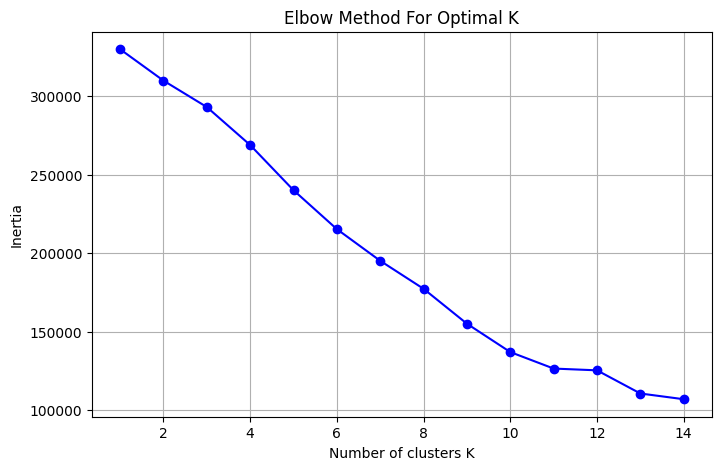

In [ ]:
# Elbow Method to find optimal K
inertia = []

K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(skills_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show()


In [ ]:
# Choose optimal K
k_optimal = 11

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
jobs_encoded_df['Cluster'] = kmeans.fit_predict(skills_scaled)

print("KMeans Clustering Done ✅")


KMeans Clustering Done ✅


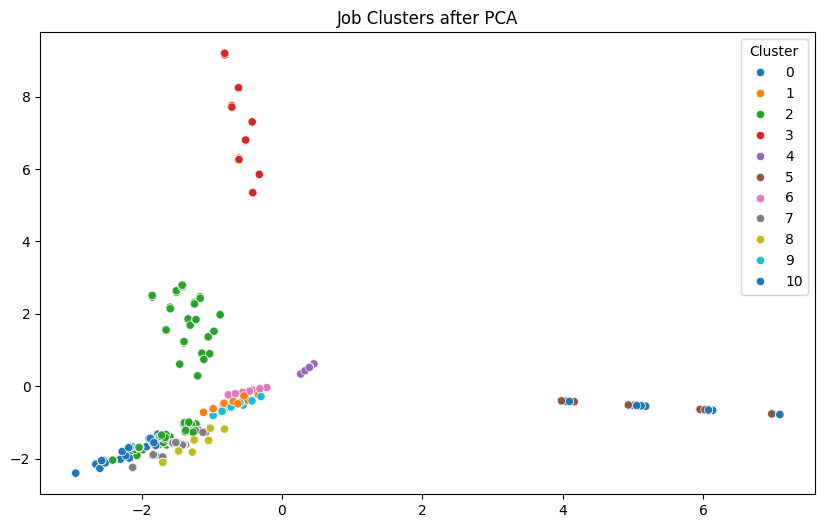

In [ ]:
# PCA for visualization (2D)
pca = PCA(n_components=2)
skills_pca = pca.fit_transform(skills_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=skills_pca[:,0], y=skills_pca[:,1], hue=jobs_encoded_df['Cluster'], palette='tab10')
plt.title('Job Clusters after PCA')
plt.show()


In [ ]:
# Number of jobs in each cluster
jobs_encoded_df['Cluster'].value_counts().sort_index()


,count
Cluster,
0,380
1,430
2,824
3,390
4,388
5,431
6,484
7,413
8,432


In [ ]:
for cluster in range(k_optimal):
    print(f"\nCluster {cluster}")
    print(jobs_encoded_df[jobs_encoded_df['Cluster'] == cluster]['Job Title'].value_counts().head(5))



Cluster 0
Job Title
Senior Data Scientist    380
Name: count, dtype: int64

Cluster 1
Job Title
AI Engineer    430
Name: count, dtype: int64

Cluster 2
Job Title
Backend Developer    414
Data Analyst         410
Name: count, dtype: int64

Cluster 3
Job Title
Frontend Developer    390
Name: count, dtype: int64

Cluster 4
Job Title
Digital Marketing Specialist    388
Name: count, dtype: int64

Cluster 5
Job Title
Cloud Engineer     427
DevOps Engineer      4
Name: count, dtype: int64

Cluster 6
Job Title
Security Analyst    484
Name: count, dtype: int64

Cluster 7
Job Title
Business Analyst    413
Name: count, dtype: int64

Cluster 8
Job Title
Java Developer    432
Name: count, dtype: int64

Cluster 9
Job Title
Database Administrator    434
Name: count, dtype: int64

Cluster 10
Job Title
DevOps Engineer    394
Name: count, dtype: int64


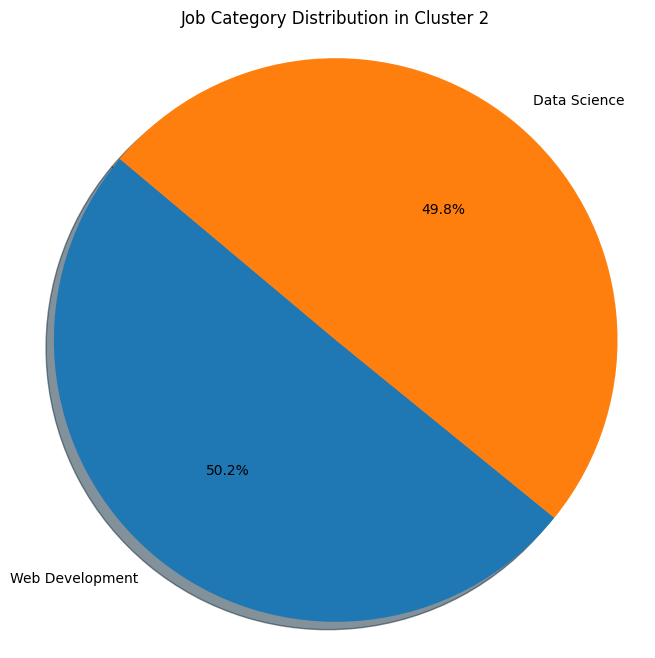

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Step 2: Load Dataset
job_skills_df = pd.read_csv("job_skills_dataset_corrected.csv")  # Update path if needed
job_skills_df['Skills Required'] = job_skills_df['Skills Required'].str.replace(' ', '')
job_skills_df['Skill_List'] = job_skills_df['Skills Required'].str.split(',')

# Step 3: Encode Skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(job_skills_df['Skill_List']), columns=mlb.classes_)

# Step 4: Combine with Job Info
jobs_encoded_df = pd.concat([job_skills_df[['Job Title', 'Job Category', 'Company', 'Salary']], skills_encoded], axis=1)

# Step 5: Scale Skills
skill_features = skills_encoded.columns
scaler = StandardScaler()
skills_scaled = scaler.fit_transform(jobs_encoded_df[skill_features])

# Step 6: Apply KMeans Clustering
kmeans = KMeans(n_clusters=11, random_state=42)
jobs_encoded_df['Cluster'] = kmeans.fit_predict(skills_scaled)

# Step 7: Pie Chart for Job Categories in a Specific Cluster
cluster_id = 2  # Change from 0 to 10 to explore other clusters
cluster_data = jobs_encoded_df[jobs_encoded_df['Cluster'] == cluster_id]
category_counts = cluster_data['Job Category'].value_counts()

# Step 8: Plot the Pie Chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title(f'Job Category Distribution in Cluster {cluster_id}')
plt.axis('equal')
plt.show()


In [ ]:
# Train KNN model to find similar jobs
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(skills_scaled)

print("KNN Model Ready ✅")


KNN Model Ready ✅


Classification Report:

                         precision    recall  f1-score   support

Artificial Intelligence       1.00      1.00      1.00        86
      Business Analysis       1.00      1.00      1.00        84
        Cloud Computing       0.98      1.00      0.99        64
          Cybersecurity       1.00      1.00      1.00       105
           Data Science       1.00      1.00      1.00       177
    Database Management       1.00      1.00      1.00        79
                 DevOps       1.00      0.99      0.99        73
      Digital Marketing       1.00      1.00      1.00        78
   Software Engineering       1.00      1.00      1.00        83
        Web Development       1.00      1.00      1.00       171

               accuracy                           1.00      1000
              macro avg       1.00      1.00      1.00      1000
           weighted avg       1.00      1.00      1.00      1000

Accuracy Score: 1.00


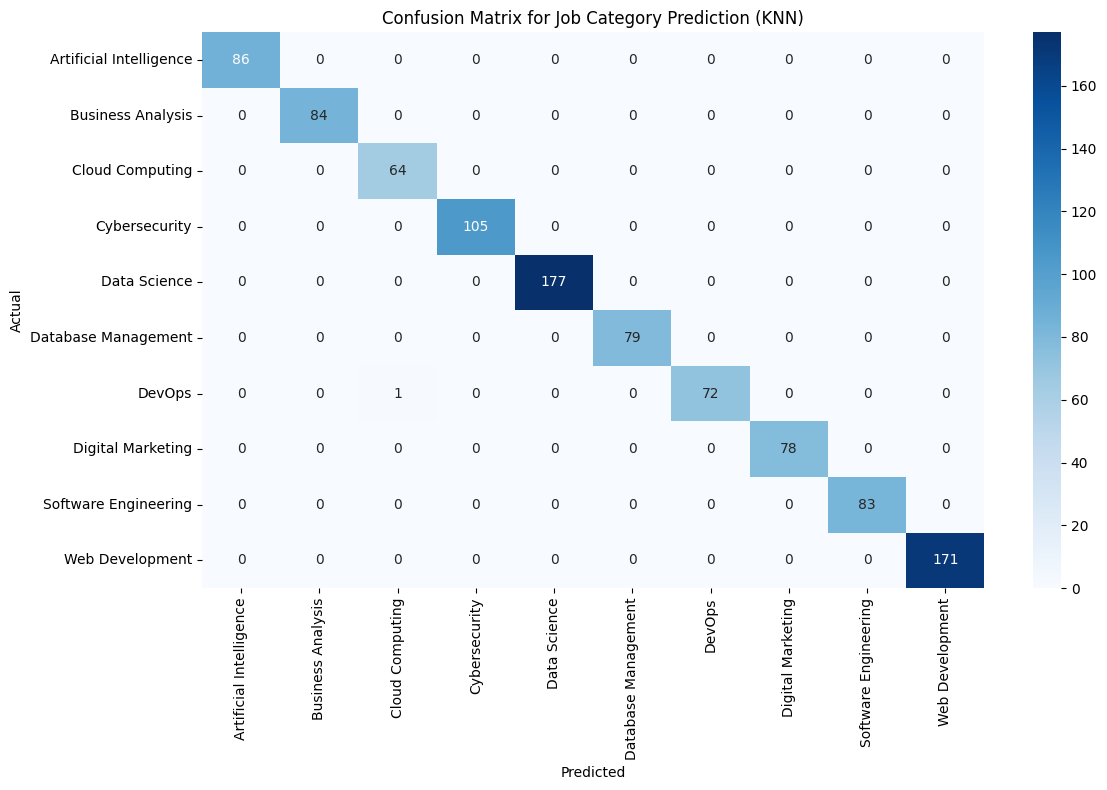

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Job-Skills Dataset
job_skills_df = pd.read_csv("job_skills_dataset_corrected.csv")
job_skills_df['Skills Required'] = job_skills_df['Skills Required'].str.replace(' ', '')
job_skills_df['Skill_List'] = job_skills_df['Skills Required'].str.split(',')

# 3. Multi-hot encode skills
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(job_skills_df['Skill_List']), columns=mlb.classes_)

# 4. Combine with job info
jobs_encoded_df = pd.concat([job_skills_df[['Job Title', 'Job Category', 'Company', 'Salary']], skills_encoded], axis=1)

# 5. Encode Job Category
le = LabelEncoder()
job_categories_encoded = le.fit_transform(jobs_encoded_df['Job Category'])
jobs_encoded_df['Job_Category_Encoded'] = job_categories_encoded  # ✅ Rename to match here

# 6. Scale skill features
skill_features = skills_encoded.columns
scaler = StandardScaler()
skills_scaled = scaler.fit_transform(jobs_encoded_df[skill_features])

# 7. Train-Test Split
X = skills_scaled
y = jobs_encoded_df['Job_Category_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 9. Predict and Evaluate
y_pred = knn.predict(X_test)

# Print classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Job Category Prediction (KNN)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Sample User Input
user_skills_input = ['Python', 'SQL', 'DataVisualization', 'MachineLearning','Pandas']
career_goal_input = 'Data Scientist'

# Multi-hot encode user skills
user_skills_encoded = np.zeros(len(skill_features))
for idx, skill in enumerate(skill_features):
    if skill in user_skills_input:
        user_skills_encoded[idx] = 1

# Scale user skills
user_skills_scaled = scaler.transform([user_skills_encoded])

# Find matching job title
goal_jobs = jobs_encoded_df[jobs_encoded_df['Job Title'].str.contains(career_goal_input, case=False)]

if len(goal_jobs) > 0:
    goal_skills = goal_jobs[skill_features].mean().values
else:
    print("Goal not found exactly, using skill match with all jobs")
    goal_skills = jobs_encoded_df[skill_features].mean().values

# Calculate % match
match_percent = (np.sum((user_skills_encoded * goal_skills)) / np.sum(goal_skills)) * 100
print(f"🔎 You match {match_percent:.2f}% skills required for {career_goal_input} role.")


🔎 You match 40.95% skills required for Data Scientist role.


In [ ]:
# Identify Missing Skills
missing_skills = []

for idx, val in enumerate(goal_skills):
    if val > 0 and user_skills_encoded[idx] == 0:
        missing_skills.append(skill_features[idx])

print("\n❌ Missing Skills You Need to Learn:")
for skill in missing_skills:
    print(f"- {skill}")



❌ Missing Skills You Need to Learn:
- DataAnalysis
- Hadoop
- Pandas
- PySpark
- Statistics
- TensorFlow


In [ ]:
# Recommend Learning Resources
print("\n📚 Recommended Learning Resources:")
for skill in missing_skills:
    resources = learning_resources_df[learning_resources_df['Skill'] == skill]['Learning Resource'].values
    if len(resources) > 0:
        print(f"{skill}: {resources[0]}")



📚 Recommended Learning Resources:
Hadoop: Coursera: Hadoop Masterclass
Pandas: LinkedIn Learning: Pandas Beginner to Advanced Course
PySpark: LinkedIn Learning: PySpark Masterclass
Statistics: LinkedIn Learning: Statistics Masterclass
TensorFlow: Coursera: TensorFlow Masterclass


In [ ]:
# Recommend Closest Jobs
distances, indices = knn_model.kneighbors(user_skills_scaled)

print("\n🎯 Closest Matching Jobs:")
for idx in indices[0]:
    job = jobs_encoded_df.iloc[idx]
    print(f"- {job['Job Title']} at {job['Company']} (Salary: {job['Salary']})")



🎯 Closest Matching Jobs:
- Data Analyst at TCS (Salary: 25 LPA)
- Data Analyst at Microsoft (Salary: 25 LPA)
- Data Analyst at Google (Salary: 25 LPA)
- Data Analyst at Google (Salary: 20 LPA)
- Data Analyst at Meta (Salary: 30 LPA)
